In [242]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib2
import bs4 #this is beautiful soup
import time
import operator
import socket
import cPickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

API registrations
=================

If you would like to run all the examples in this notebook, you need to register for the following APIs:

* Rotten Tomatoes

http://developer.rottentomatoes.com/member/register

* Twitter

https://apps.twitter.com/app/new

* Twitter instructions

https://twittercommunity.com/t/how-to-get-my-api-key/7033

CS109
=====

Verena Kaynig-Fittkau, Joe Blitzstein, Hanspeter Pfister

* vkaynig@seas.harvard.edu
* staff@cs109.org

Announcements
==============

Nothing at the moment

Todays lecture:
===============

* introduction to pandas
    - read a table
    - do some plots

* all about data scraping
* ***What is it? ***
* How to do it:
    - from a website
    - with an API

IPython Notebooks:
===================

![IPython](images/ipython.png "IPython")

IPython Notebooks:
===================

* These slides are an IPython notebook!
* https://github.com/damianavila/live_reveal

In [243]:
print "Hello CS109"

print "I love IPython"

# Ipython notebook have tab completion!
# and inbuild help
  
a = np.zeros(3)


Hello CS109
I love IPython


General advice about programming
==================================

* You will find nearly everything on google
* Try: length of a list in python
* A programmer is someone who can turn stack overflow snippets into running code
* Use tab completion
* Make your variable names meaningful


How to load a table
===================

* we use Pandas for this
* Pandas can do a __lot__ more
* more about it later

The MovieLens data
===================

http://grouplens.org/datasets/movielens/

![Grouplens](images/grouplens.jpg "Grouplens")

Example inspired by [Greg Reda](http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/)

Read the user data
==================

In [244]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols)

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Read the ratings
============

In [245]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols)

ratings.head() 

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Now data about the movies
=========================

In [246]:
# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 
            'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5))

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Get information about data
=======================

In [247]:
print movies.dtypes
print
print movies.describe()
# *** Why only those two columns? ***

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

          movie_id  video_release_date
count  1682.000000                   0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


Selecting data
==============

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [248]:
users.head()
users['occupation'].head()
## *** Where did the nice design go? ***
columns_you_want = ['occupation', 'sex'] 
users[columns_you_want].head()

print users.head()

print users.iloc[3]

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213
user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object


Filtering data
==============

Select users older than 25

In [249]:
oldUsers = users[users.age > 25]
oldUsers.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


Quiz:
=====

* show users aged 40 and male

* show the mean age of female programmers

In [250]:
# users aged 40 AND male
# your code here

criteria = (users.age == 40) & (users.sex == 'M')
male_40 = users[criteria]
male_40.head()

,user_id,age,sex,occupation,zip_code
18,19,40,M,librarian,02138
82,83,40,M,other,44133
115,116,40,M,healthcare,97232
199,200,40,M,programmer,93402
283,284,40,M,executive,92629


In [251]:
## users who are female and programmers
# your code here
print users.occupation.unique(), '\n'

criteria = (users.sex == 'F') & (users.occupation == 'programmer')
female_programmers = users[criteria]

print female_programmers.head(), '\n'
## show statistic summary or compute mean
# your code here

print "Mean age of female programmers is {:.1f}".format(female_programmers.age.mean())

['technician' 'other' 'writer' 'executive' 'administrator' 'student'
 'lawyer' 'educator' 'scientist' 'entertainment' 'programmer' 'librarian'
 'homemaker' 'artist' 'engineer' 'marketing' 'none' 'healthcare' 'retired'
 'salesman' 'doctor'] 

     user_id  age sex  occupation zip_code
291      292   35   F  programmer    94703
299      300   26   F  programmer    55106
351      352   37   F  programmer    55105
403      404   29   F  programmer    55108
420      421   38   F  programmer    55105 

Mean age of female programmers is 32.2


Split-apply-combine
===================

* splitting the data into groups based on some criteria
* applying a function to each group independently
* combining the results into a data structure

Split-apply-combine
===================

<img src=http://i.imgur.com/yjNkiwL.png></img>

Find Diligent Users
===================

* split data per user ID
* count ratings
* combine result

In [252]:
print ratings.head()
## split data
#grouped_data = ratings.groupby('user_id')
grouped_data = ratings.groupby(ratings['user_id'])

## count and combine
ratings_per_user = grouped_data.count()

ratings_per_user.head(5)

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


,movie_id,rating,unix_timestamp
user_id,,,
1,272,272,272
2,62,62,62
3,54,54,54
4,24,24,24
5,175,175,175


Quiz
====

* get the average rating per movie
* advanced: get the movie titles with the highest average rating

In [253]:
## split data
# your code here
grouped_data_2 = ratings.groupby(ratings['movie_id'])

## average and combine
# your code here
ratings_per_movie = grouped_data_2['rating'].mean()
print ratings_per_movie.head()

# get the maximum rating
# your code here
max_rating = ratings_per_movie.max()

# get movie ids with that rating
# your code here
mov_id = ratings_per_movie[ratings_per_movie == max_rating].index
print mov_id


movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64
Int64Index([814, 1122, 1189, 1201, 1293, 1467, 1500, 1536, 1599, 1653], dtype='int64', name=u'movie_id')


In [254]:
print "Good movie ids:"
print mov_id
print

print "Best movie titles"
print movies.title[mov_id-1], '\n'

print "Best movie titles"
print movies[movies.movie_id.isin(mov_id)].title

Good movie ids:
Int64Index([814, 1122, 1189, 1201, 1293, 1467, 1500, 1536, 1599, 1653], dtype='int64', name=u'movie_id')

Best movie titles
movie_id
813                         Great Day in Harlem, A (1994)
1121                       They Made Me a Criminal (1939)
1188                                   Prefontaine (1997)
1200           Marlene Dietrich: Shadow and Light (1996) 
1292                                      Star Kid (1997)
1466                 Saint of Fort Washington, The (1993)
1499                            Santa with Muscles (1996)
1535                                 Aiqing wansui (1994)
1598                        Someone Else's America (1995)
1652    Entertaining Angels: The Dorothy Day Story (1996)
Name: title, dtype: object 

Best movie titles
813                         Great Day in Harlem, A (1994)
1121                       They Made Me a Criminal (1939)
1188                                   Prefontaine (1997)
1200           Marlene Dietrich: Shadow and Light 

In [255]:
# get number of ratings per movie
# your code here
noOfRatings = grouped_data_2['rating'].count()

print "Number of ratings per movie"
print ",".join(noOfRatings[mov_id].values.astype('string'))

Number of ratings per movie
1,1,3,1,3,2,2,1,1,1


Passing a Function
==================


Quiz
====

* get the average rating per user
* advanced: list all occupations and if they are male or female dominant

In [256]:
# get the average rating per user
# your code here
average_ratings = grouped_data.apply(lambda f: f.mean())
print average_ratings.head(5), '\n'
print "Average rating per user is {:.1f}".format(average_ratings.rating.mean())

           movie_id    rating  unix_timestamp
user_id                                      
1        136.500000  3.610294    8.773916e+08
2        249.500000  3.709677    8.886204e+08
3        318.814815  2.796296    8.892372e+08
4        291.041667  4.333333    8.920028e+08
5        291.291429  2.874286    8.762081e+08 

Average rating per user is 3.6


In [257]:
# list all occupations and if they are male or female dominant
# your code here

users_by_occup = users.groupby("occupation")
male_dom_occup = users_by_occup.sex.apply(lambda f: sum(f == 'M') > sum(f == 'F'))
print male_dom_occup, '\n'

print "male dominated jobs include", ",".join(male_dom_occup.index[male_dom_occup.values])

occupation
administrator     True
artist            True
doctor            True
educator          True
engineer          True
entertainment     True
executive         True
healthcare       False
homemaker        False
lawyer            True
librarian        False
marketing         True
none              True
other             True
programmer        True
retired           True
salesman          True
scientist         True
student           True
technician        True
writer            True
Name: sex, dtype: bool 

male dominated jobs include administrator,artist,doctor,educator,engineer,entertainment,executive,lawyer,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer


In [258]:
print 'number of male users: '
print sum(users['sex'] == 'M')

print 'number of female users: '
print sum(users['sex'] == 'F')

number of male users: 
670
number of female users: 
273


Pandas "wrapup"
==========

- create data frames
- get sub-frames
- filter data 
- use group-by
- apply a user defined function


![cute panda](images/cute_panda.jpg)

Python data scraping
====================

* Why scrape the web?
    - vast source of information
    - automate tasks
    - keep up with sites
    - fun!

** Can you think of examples ? **

Read and Tweet!
=================

![ReadTweet](http://developer.nytimes.com/files/readtweet.jpg)

* by Justin Blinder
* http://projects.justinblinder.com/We-Read-We-Tweet

“We Read, We Tweet” geographically visualizes the dissemination of New York Times articles through Twitter. Each line connects the location of a tweet to the contextual location of the New York Times article it referenced. The lines are generated in a sequence based on the time in which a tweet occurs. The project explores digital news distribution in a temporal and spatial context through the social space of Twitter.

Twitter Sentiments
=================

![TwitterSentiments](http://www.csc.ncsu.edu/faculty/healey/tweet_viz/figs/tweet-viz-ex.png
 "Twitter Sentiments")

* by Healey and Ramaswamy
* http://www.csc.ncsu.edu/faculty/healey/tweet_viz/tweet_app/

Type a keyword into the input field, then click the Query button. Recent tweets that contain your keyword are pulled from Twitter and visualized in the Sentiment tab as circles. Hover your mouse over a tweet or click on it to see its text.

Python data scraping
====================

* copyrights and permission:
    - be careful and polite
    - give credit
    - care about media law
    - don't be evil (no spam, overloading sites, etc.)

Robots.txt
==========

![Robots.txt](images/robots_txt.jpg "Robots.txt")

Robots.txt
==========

* specified by web site owner
* gives instructions to web robots (aka your script)
* is located at the top-level directory of the web server

http://www.example.com/robots.txt

If you want you can also have a look at

http://google.com/robots.txt

Robots.txt
==========

*** What does this one do? ***

Things to consider:
-------------------

* can be just ignored
* can be a security risk - *** Why? ***

Scraping with Python:
=====================

* scraping is all about HTML tags
* bad news: 
    - need to learn about tags
    - websites can be ugly

HTML
=====

* HyperText Markup Language

* standard for creating webpages

* HTML tags 
    - have angle brackets
    - typically come in pairs

This is an example for a minimal webpage defined in HTML tags. The root tag is `<html>` and then you have the `<head>` tag. This part of the page typically includes the title of the page and might also have other meta information like the author or keywords that are important for search engines. The `<body>` tag marks the actual content of the page. You can play around with the `<h2>` tag trying different header levels. They range from 1 to 6. 

In [259]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

Useful Tags
===========

* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`


Scraping with Python:
=====================

* example of a beautifully simple webpage:

http://www.crummy.com/software/BeautifulSoup

Scraping with Python:
=====================

* good news: 
    - some browsers help
    - look for: inspect element
    - need only basic html
    
** Try 'Ctrl-Shift I' in Chrome **

** Try 'Command-Option I' in Safari **


Scraping with Python
==================

* different useful libraries:
    - urllib
    - beautifulsoup
    - pattern
    - soupy
    - LXML
    - ...
    

The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [260]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = urllib2.urlopen(url).read()
print source

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<img align="right" src="10.1.jpg" width="250"><br />

<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.</p>

<

Quiz :
======

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'alien video games' ?
    - hint: use `.find()`

In [261]:
## is 'Alice' in source?
print 'Alice' in source

## count occurences of 'Soup'
print source.count("Soup")

## find index of 'alien video games'
phrase = 'alien video games'
phrase_len = len(phrase)

index = source.find(phrase)

print index
print source[index:index+phrase_len]

False
41
1639
alien video games


Beautiful Soup
==============

* designed to make your life easier
* many good functions for parsing html code

Some examples
=============


In [262]:
## get bs4 object
soup = bs4.BeautifulSoup(source, "lxml")
 
## compare the two print statements
#print soup
#print soup.prettify()

## show how to find all a tags
soup.findAll('a')

## ***Why does this not work? ***
#soup.findAll('Soup')

[<a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="http://www.candlemarkandgleam.com/shop/constellation-games/"><i>Constellation\nGames</i>, my sci-fi novel about alien video games</a>,
 <a href="http://constellation.crummy.com/Constellation%20Games%20excerpt.html">read\nthe first two chapters for free</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion\ngroup</a>,
 <a href="https://bugs.launchpad.net/beautifulsoup/">file it</a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a name="Download"><h2>Download Beautiful Soup</h2></a>,
 <a href="bs4/download/">Beautiful Soup\n

Some examples
=============

In [263]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, not all tags in the string
first_tag = soup.find('a')

## get attribute `href`
first_tag.get('href')

## get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

['bs4/download/',
 '#Download',
 'bs4/doc/',
 '#HallOfFame',
 'https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://www.candlemarkandgleam.com/shop/constellation-games/',
 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.1.tar.gz',
 None,
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 '

In [264]:
## filter all external links
# create an empty list to collect the valid links
# external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
# for l in link_list:
#     if l[:4] == 'http':
#         external_links.append(l)

# this throws an error! It says something about 'NoneType'

In [265]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements!
# Let's verify
print sum([l is None for l in link_list])

# So there are two elements in the list that are None!

2


In [266]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://www.candlemarkandgleam.com/shop/constellation-games/',
 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/',
 'https://launchpad.net/beauti

Note: The above `if` condition works because of lazy evaluation in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

In [267]:
# and we can put this in a list comprehension as well, it almost reads like 
# a sentence.

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://www.candlemarkandgleam.com/shop/constellation-games/',
 'http://constellation.crummy.com/Constellation%20Games%20excerpt.html',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/',
 'https://launchpad.net/beauti

Parsing the Tree
================



In [268]:
# redifining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s, "lxml")

## get html root node
root_node = tree.html
print root_node

## get head from root using contents
head = root_node.contents[0]
print head

## get body from root
body = root_node.contents[1]
print body 

## could directly access body
tree.body


<html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>
<head><title>This is a title</title></head>
<body><h3> Test </h3><p>Hello world!</p></body>


<body><h3> Test </h3><p>Hello world!</p></body>

Quiz:
=====

* Find the `h3` tag by parsing the tree starting at `body`
* Create a list of all __Hall of Fame__ entries listed on the Beautiful Soup webpage
    - hint: it is the only unordered list in the page (tag `ul`)


In [269]:
## get h3 tag from body
tree.body.find("h3").string

u' Test '

In [270]:
## use ul as entry point

hof_list = soup.find('ul').findAll('li')
## get hall of fame list from entry point
## skip the first entry 
hof_list_reduced = hof_list[1:]

## reformat into a list containing strings
## it is ok to have a list of lists
#print hof_list_reduced[1].find('a').previous
#print hof_list_reduced[1].find('a').next
#print hof_list_reduced[1].find('a').next.next

tmp = []

for item in hof_list_reduced:
    tmp.append([l.string for l in item])

print tmp
# for item in hof_list_reduced:
#     item_nxt = item.next
#     while item_nxt:
#         print item_nxt
#         item_nxt = item_nxt.next
    #print item.find('a').previous, item.find('a').next, item.find('a').next.next
    #print '\n'

    




[[u'Reddit uses Beautiful Soup to ', u"parse\na page that's been linked to and find a representative image", u'.\n\n'], [u'Alexander Harrowell uses Beautiful Soup to ', u'track the business\n activities', u' of an arms merchant.\n\n'], [u'The developers of Python itself used Beautiful Soup to ', u'migrate the Python\nbug tracker from Sourceforge to Roundup', u'.\n\n'], [u'The ', u'Lawrence Journal-World', u'\nuses Beautiful Soup to ', u'gather\nstatewide election results', u'.\n\n'], [u'The ', u"NOAA's Forecast\nApplications Branch", u' uses Beautiful Soup in ', u'TopoGrabber', u', a script for\ndownloading "high resolution USGS datasets."\n\n']]


`tmp` now is actually a list of lists containing the hall of fame entries. 
Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are: 
* The use of `""` to just access the `join` function of strings.
* The `join` function itself
* that you can actually have two nested for loops in a list comprehension

In [271]:
test =  ["".join(str(a) for a in sublist) for sublist in tmp]
print '\n'.join(test)

Reddit uses Beautiful Soup to parse
a page that's been linked to and find a representative image.


Alexander Harrowell uses Beautiful Soup to track the business
 activities of an arms merchant.


The developers of Python itself used Beautiful Soup to migrate the Python
bug tracker from Sourceforge to Roundup.


The Lawrence Journal-World
uses Beautiful Soup to gather
statewide election results.


The NOAA's Forecast
Applications Branch uses Beautiful Soup in TopoGrabber, a script for
downloading "high resolution USGS datasets."




Advanced Example
===============

Idea by [Jesse Steinweg-Woods](https://jessesw.com/Data-Science-Skills/)
--------------------------------------------------------------------------------

Scraping data science skills
=============================

- What skills are in demand for data scientists?
- Should we have a lecture on Spark or only on MapReduce?

We want to scrape the information from job advertisements for data scientists from indeed.com
Let's scrape and find out!

In [272]:
# Fixed url for job postings containing data scientist
url = 'http://www.indeed.com/jobs?q=data+scientist&l='
# read the website
source = urllib2.urlopen(url).read()
# parse html code
bs_tree = bs4.BeautifulSoup(source)

In [273]:
# see how many job postings we found
job_count_string = bs_tree.find(id = 'searchCount').contents[0]
print job_count_string.split()
job_count_string = job_count_string.split()[-1]
print("Search yielded %s hits." % (job_count_string))

# not that job_count so far is still a string, 
# not an integer, and the , separator prevents 
# us from just casting it to int

job_count_digits = [int(d) for d in job_count_string if d.isdigit()]
print job_count_digits
job_count = np.sum([digit*(10**exponent) for digit, exponent in 
                    zip(job_count_digits[::-1], range(len(job_count_digits)))])

job_count = np.sum([digit*(10**exponent) for digit, exponent in 
                    zip(job_count_digits[::-1], range(len(job_count_digits)))])

print job_count


[u'Jobs', u'1', u'to', u'10', u'of', u'22,874']
Search yielded 22,874 hits.
[2, 2, 8, 7, 4]
22874


In [274]:
# The website is only listing 10 results per page, 
# so we need to scrape them page after page
num_pages = int(np.ceil(job_count/10.0))

base_url = 'http://www.indeed.com'
job_links = []
for i in range(2): #do range(num_pages) if you want them all
    if i%10==0:
        print num_pages-i
    url = 'http://www.indeed.com/jobs?q=data+scientist&start=' + str(i*10)
    html_page = urllib2.urlopen(url).read() 
    bs_tree = bs4.BeautifulSoup(html_page)
    job_link_area = bs_tree.find(id = 'resultsCol')
    job_postings = job_link_area.findAll("div")
    job_postings = [jp for jp in job_postings if not jp.get('class') is None 
                    and ''.join(jp.get('class')) =="rowresult"]
    job_ids = [jp.get('data-jk') for jp in job_postings]
    
    # go after each link
    for id in job_ids:
        job_links.append(base_url + '/rc/clk?jk=' + id)

    time.sleep(1)

print "We found a lot of jobs: ", len(job_links)

2288
We found a lot of jobs:  24


In [275]:
print job_count 
job_links

22874


['http://www.indeed.com/rc/clk?jk=7c77355609e0aae4',
 'http://www.indeed.com/rc/clk?jk=88c2d3973e33de7f',
 'http://www.indeed.com/rc/clk?jk=07f1b46928f006b0',
 'http://www.indeed.com/rc/clk?jk=156f9618f7af45cd',
 'http://www.indeed.com/rc/clk?jk=4438623155fcce77',
 'http://www.indeed.com/rc/clk?jk=48176099e5fb2b2d',
 'http://www.indeed.com/rc/clk?jk=95ec4a3aca0ad363',
 'http://www.indeed.com/rc/clk?jk=0b4a5a3379ca5450',
 'http://www.indeed.com/rc/clk?jk=26bc04850604621e',
 'http://www.indeed.com/rc/clk?jk=6ca41a9918287f12',
 'http://www.indeed.com/rc/clk?jk=b0114865bcd4e31e',
 'http://www.indeed.com/rc/clk?jk=936fb8ea0311ea89',
 'http://www.indeed.com/rc/clk?jk=2b36c3436e979f79',
 'http://www.indeed.com/rc/clk?jk=d100e9f517b50a7e',
 'http://www.indeed.com/rc/clk?jk=e100481d2933914c',
 'http://www.indeed.com/rc/clk?jk=9518d2abeb33e4a2',
 'http://www.indeed.com/rc/clk?jk=fae72cf35fbb821b',
 'http://www.indeed.com/rc/clk?jk=bd4351891509542e',
 'http://www.indeed.com/rc/clk?jk=08e62497acc4

Some precautions to enable us to restart our search
=========================

In [276]:
# Save the scraped links
with open('data/scraped_links.pkl', 'wb') as f:
    cPickle.dump(job_links, f)
    
# Read canned scraped links
with open('data/scraped_links.pkl', 'r') as f:
    job_links = cPickle.load(f)



In [277]:
skill_set = {'mapreduce': 0, 'spark': 0}

## write initialization into a file, so we can restart later
with open('scraped_links_restart.pkl', 'wb') as f:
    cPickle.dump((skill_set, 0),f)    

Python Dictonaries
==================

* build in data type
* uses key: value pairs

In [288]:
a = {'a': 1, 'b':2}
print a

#show keys
print a.keys()

#show values
print a.values()

#show for loop over all entries
# option 1 using zip
# this works also for iterating over any
# other two lists
for k,v in zip(a.keys(), a.values()):
    print k,v

# option 2 using the dictionary `iteritems()` function
for k,v in a.iteritems():
    print k,v

{'a': 1, 'b': 2}
['a', 'b']
[1, 2]
a 1
b 2
a 1
b 2


In [279]:
# This code below does the trick, but could be optimized for speed if necessary
# e.g. skills are typically listed at the end of the webpage
# might not need to split/join the whole webpage, as we already know
# which words we are looking for 
# and could stop after the first occurance of each word

with open('data/scraped_links_restart.pkl', 'r') as f:
    skill_set, index = cPickle.load(f)
    print "How many websites still to go? ", len(job_links) - index
    
    

How many websites still to go?  -216


In [280]:
counter = 0

for link in job_links[index:]:
    counter +=1  
    
    try:
        html_page = urllib2.urlopen(link).read()
    except urllib2.HTTPError:
        print "HTTPError:"
        continue
    except urllib2.URLError:
        print "URLError:"
        continue
    except socket.error as error:
        print "Connection closed"
        continue

    html_text = re.sub("[^a-z.+3]"," ", html_page.lower()) # replace all but the listed characters
        
    for key in skill_set.keys():
        if key in html_text:  
            skill_set[key] +=1
            
    if counter % 5 == 0:
        print len(job_links) - counter - index
        print skill_set
        with open('scraped_links_restart.pkl','wb') as f:
            cPickle.dump((skill_set, index+counter),f)

In [297]:
source_text = re.sub("[^a-z.+3]"," ", source.lower())
source_text

'    xml version   .   encoding  utf         doctype html public     w3c  dtd html  .   transitional  en     html    head     title downtownla.com   happy hours   title     script type  text javascript  src  http   partner.googleadservices.com gampad google service.js      script    script type  text javascript      gs googleaddadsenseservice  ca pub 33            3        gs googleenableallservices       script    script type  text javascript      ga googleaddslot  ca pub 33            3     level  about       ga googleaddslot  ca pub 33            3     level  connect       ga googleaddslot  ca pub 33            3     level  live       ga googleaddslot  ca pub 33            3     level  play       ga googleaddslot  ca pub 33            3     level  work       ga googleaddslot  ca pub 33            3     level  about       ga googleaddslot  ca pub 33            3     level  connect       ga googleaddslot  ca pub 33            3     level  live       ga googleaddslot  ca pub 33        

In [298]:
print skill_set

{'spark': 31, 'mapreduce': 16}


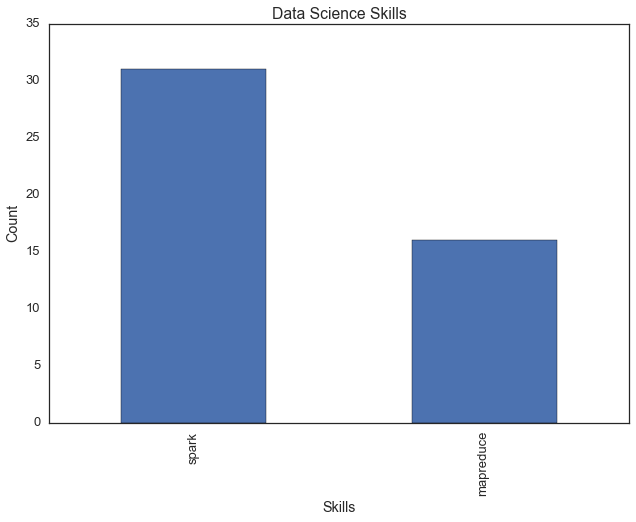

In [282]:
pseries = pd.Series(skill_set)
pseries.sort(ascending=False)

pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
## set the x label
plt.xlabel('Skills')
## set the y label
plt.ylabel('Count')
## show the plot
plt.show()

Another Example
================

Designed by Katharine Jarmul
----------------------------

https://github.com/kjam/python-web-scraping-tutorial




Scraping Happy Hours
====================

Scrape the happy hour list of LA for personal preferences

http://www.downtownla.com/3_10_happyHours.asp?action=ALL

This example is part of her talk about data scraping at PyCon2014. She is a really good speaker and I enjoyed watching her talk. Check it out: http://www.youtube.com/watch?v=p1iX0uxM1w8

In [283]:
stuff_i_like = ['burger', 'sushi', 'sweet potato fries', 'BBQ','beer']
found_happy_hours = []
my_happy_hours = []
# First, I'm going to identify the areas of the page I want to look at
url = 'http://www.downtownla.com/3_10_happyHours.asp?action=ALL'
source = urllib2.urlopen(url).read()
tables = bs4.BeautifulSoup(source)

In [284]:
# Then, I'm going to sort out the *exact* parts of the page
# that match what I'm looking for...
for t in tables.findAll('p', {'class': 'calendar_EventTitle'}):
    text = t.text
    for s in t.findNextSiblings():
        text += '\n' + s.text
    found_happy_hours.append(text)

print "The scraper found %d happy hours!" % len(found_happy_hours)

The scraper found 73 happy hours!


In [285]:
# Now I'm going to loop through the food I like
# and see if any of the happy hour descriptions match
for food in stuff_i_like:
    for hh in found_happy_hours:
        # checking for text AND making sure I don't have duplicates
        if food in hh and hh not in my_happy_hours:
            print "YAY! I found some %s!" % food
            my_happy_hours.append(hh)

print "I think you might like %d of them, yipeeeee!" % len(my_happy_hours)

YAY! I found some burger!
YAY! I found some sushi!
YAY! I found some sushi!
YAY! I found some sushi!
YAY! I found some BBQ!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
YAY! I found some beer!
I think you might like 22 of them, yipeeeee!


In [286]:
# Now, let's make a mail message we can read:
message = 'Hey Katharine,\n\n\n'
message += 'OMG, I found some stuff for you in Downtown, take a look.\n\n'
message += '==============================\n'.join(my_happy_hours)
message = message.encode('utf-8')
# To read more about encoding:
# http://diveintopython.org/xml_processing/unicode.html
message = message.replace('\t', '').replace('\r', '')
message += '\n\nXOXO,\n Your Py Script'

#print message

Getting Data with an API
=========================

* API: application programming interface
* some sites try to make your life easier
* Twitter, New York Times, ImDB, rotten Tomatoes, Yelp, ...

Rotten Tomatoes
===============

![The Wizard of Oz](images/wiz_oz.png "The wizard of Oz")

http://www.rottentomatoes.com/top/


API keys
=========

* required for data access
* identifies application (you)
* monitors usage
* limits rates

Rotten Tomatoes Key
===================

http://developer.rottentomatoes.com/member/register

In [287]:
import json
import requests

api_key = rottenTomatoes_key()

url = 'http://api.rottentomatoes.com/api/public/v1.0/lists/dvds/top_rentals.json?apikey=' + api_key
data = urllib2.urlopen(url).read()
#print data

NameError: name 'rottenTomatoes_key' is not defined

JSON
======

* JavaScript Object Notation
* human readable
* transmit attribute-value pairs

In [ ]:
a = {'a': 1, 'b':2}
s = json.dumps(a)
a2 = json.loads(s)

## a is a dictionary
print a
## vs s is a string containing a in JSON encoding
print s
## reading back the keys are now in unicode
print a2

In [ ]:
## create dictionary from JSON 
dataDict = json.loads(data)

## expore dictionary
print dataDict.keys()

## there is a key named `movies` containing a list of movies as a value
movies = dataDict['movies']

## each element of the list `movies` is a dictionary
print movies[0].keys()

## one of the keys is called `ratings`
## the value is yet another dictionary
print movies[0]['ratings'].keys()

## so we made it all the way to find the critics score
print movies[0]['ratings']['critics_score']


Quiz
=====

* build a list with critics scores
* build a list with audience scores

In [ ]:
# critics scores list


# audience scores list


The following code shows how to create a pandas data frame with the data we gathered from the webpage.
Beware of the `set_index()` function in pandas. Per default it does not change the actual data frame! You need to either reassign the output or set the `inplace` argument to `True`.

In [ ]:
## create pandas data frame with critics and audience score
scores = pd.DataFrame(data=[critics_scores, audience_scores]).transpose()
scores.columns = ['critics', 'audience']

## also create a list with all movie titles
movie_titles = [m['title'] for m in movies]

## set index of dataFrame BEWARE of inplace!
scores.set_index([movie_titles])

## the line above does not changes scores!
## You need to either reassign

scores = scores.set_index([movie_titles])

## or set the inplace argument to True
scores.set_index([movie_titles], inplace=True)
scores.head(3)

In [ ]:
## create a bar plot with the data
## notice that we are using the data frame itself and call its plot function
scores.plot(kind = 'bar')

## set the title to Score Comparison
plt.title('Score Comparison')

## set the x label
plt.xlabel('Movies')

## set the y label
plt.ylabel('Scores')

In [ ]:
## show the plot
plt.show()

Twitter Example:
================

* API a bit more complicated
* libraries make life easier
* python-twitter

https://github.com/bear/python-twitter

What we are going to do is scrape Joe's twitter account, and then filter it for the interesting tweets. Defining interesting as tweets that have be re-tweeted at least 10 times. 


In [ ]:
import twitter

## define the necessary keys
cKey = twitterAPI_key()
cSecret = twitterAPI_secret()
aKey = twitterAPI_access_token_key()
aSecret = twitterAPI_access_token_secret()

## create the api object with the twitter-python library
api = twitter.Api(consumer_key=cKey, consumer_secret=cSecret, access_token_key=aKey, access_token_secret=aSecret)


In [ ]:
## get the user timeline with screen_name = 'stat110'
twitter_statuses = api.GetUserTimeline(screen_name = 'stat110')

## create a data frame
## first get a list of panda Series or dict
pdSeriesList = [pd.Series(t.AsDict()) for t in twitter_statuses]

## then create the data frame
data = pd.DataFrame(pdSeriesList)

data.head(2)

In [ ]:
## filter tweets with enough retweet_count
maybe_interesting = data[data.retweet_count>20]

## get the text of these tweets
tweet_text = maybe_interesting.text

## print them out
text = tweet_text.values

for t in text:
    print '######'
    print t

Extracting columns:
===================

__Warning:__ The returned column `tweet_text` is a `view` on the data
    
* it is not a copy
* you change the Series => you change the DataFrame

Below is another example of such a view:

In [ ]:
## create a view for favorite_count on maybe_interesting
view = maybe_interesting['favorite_count']
print '-----------------'
print "This is view:"
print view
## change a value
view[8] = 9999

## look at original frame
print '-----------------'
print "This is view after changing view[8]"
print view

print '-----------------'
print "This is maybe_interesting after changing view[8]"
print "It changed too!"
print maybe_interesting['favorite_count']

## to avoid this you can use copy
independent_data = maybe_interesting['favorite_count'].copy()
independent_data[10] = 999
print '-----------------'
print "This is independent_data after changed at 10:"
print independent_data
print '-----------------'
print "This is maybe_interesting after changing independent_data:"
print "It did not change because we only changed a copy of it"
print maybe_interesting['favorite_count']

What we covered today:
============

* Pandas data frames
* Guidelines for friendly scraping
* Scraping html sites
* Scraping with Api's
* Basic data cleanup


Further material
================

* I highly recommend Katharine Jarmul's scraping tutorials
* For example [this one](https://www.youtube.com/watch?v=p1iX0uxM1w8)
* Pandas has extensive [documentation](http://pandas.pydata.org/pandas-docs/stable/)
* Especially the [tem minutes to pandas chapter](http://pandas.pydata.org/pandas-docs/stable/10min.html)

* [Greg Reda](http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/) did a lot more pandas examples for the movie lens data set